In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# version check

In [5]:
version = 'v1'

# label load

In [6]:
train_X = pd.read_excel('./data/all_10_random_12000_262_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
val_X = pd.read_excel('./data/all_10_random_12000_262_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_X = pd.read_excel('./data/all_10_random_12000_262_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2798, 262)
(932, 262)
(932, 262)


# trained model load

In [10]:
encoder = load_model('./weights/stacked_encoder_extra_all_{}.h5'.format(version))
decoder = load_model('./weights/stacked_decoder_extra_all_{}.h5'.format(version))

C:\Users\user\.conda\envs\mlc2\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### train data

In [11]:
train_encode = encoder.predict(one_hot_train_labels)
train_encode

array([[1.0110232 , 7.160912  , 6.622326  , 9.175439  ],
       [0.3988486 , 0.19355565, 0.30107436, 0.29946786],
       [0.35640314, 0.4756924 , 0.4730814 , 0.59464264],
       ...,
       [0.70231366, 0.55933225, 0.9492014 , 0.9274311 ],
       [0.        , 8.660433  , 4.7463727 , 8.818042  ],
       [0.27275097, 0.14432618, 0.08422307, 0.0833914 ]], dtype=float32)

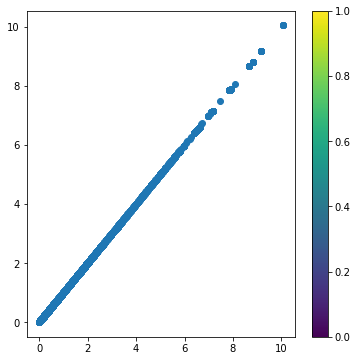

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(train_encode[:, :], train_encode[:, :])
plt.colorbar()
plt.show()

In [13]:
train_encode_df = pd.DataFrame(train_encode)
train_encode_df

,0,1,2,3
0,1.011023,7.160912,6.622326,9.175439
1,0.398849,0.193556,0.301074,0.299468
2,0.356403,0.475692,0.473081,0.594643
3,1.011023,7.160912,6.622326,9.175439
4,0.491272,0.191371,0.420455,0.363958
...,...,...,...,...
2793,0.324759,0.139948,0.149875,0.140516
2794,0.000000,8.660433,4.746373,8.818042
2795,0.702314,0.559332,0.949201,0.927431
2796,0.000000,8.660433,4.746373,8.818042


In [14]:
train_encode_df.to_excel('./sae_extra_all_{}_latent_vector_train.xlsx'.format(version))

In [15]:
train_decode = decoder.predict(train_encode)
train_decode

array([[6.55944314e-05, 1.22912251e-03, 2.10658709e-06, ...,
        3.90096416e-14, 3.63445841e-03, 6.20339240e-04],
       [2.07156520e-02, 1.74443796e-03, 4.07279120e-04, ...,
        5.54876460e-04, 1.06530199e-04, 4.82886026e-06],
       [9.54134297e-03, 4.99928901e-05, 1.15893374e-04, ...,
        1.83804204e-07, 1.81587689e-04, 6.86290514e-06],
       ...,
       [1.84843491e-03, 1.68663234e-07, 2.64487767e-06, ...,
        7.98146011e-12, 5.44969998e-06, 9.45193364e-08],
       [3.63042318e-10, 1.17223058e-03, 1.20760596e-04, ...,
        1.61240757e-10, 8.72064568e-03, 1.16540387e-03],
       [4.79048686e-06, 9.34348442e-03, 2.12743506e-02, ...,
        4.70150867e-03, 4.57012979e-03, 1.03170215e-03]], dtype=float32)

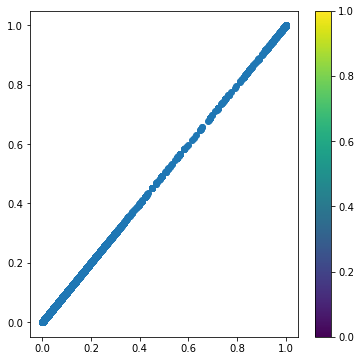

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(train_decode[:, :], train_decode[:, :])
plt.colorbar()
plt.show()

In [17]:
train_predict = train_decode.round()
train_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
"""train_predict = np.where(train_decode > 0.5, 1, 0)
train_predict"""

'train_predict = np.where(train_decode > 0.5, 1, 0)\ntrain_predict'

In [19]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [20]:
#c_matrix.shape

In [21]:
#c_matrix

In [22]:
print('accuracy : ', accuracy_score(one_hot_train_labels, train_predict))
print('precision : ', precision_score(one_hot_train_labels, train_predict, average='micro'))
print('recall : ', recall_score(one_hot_train_labels, train_predict, average='micro'))
print('f1 : ', f1_score(one_hot_train_labels, train_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_train_labels, train_predict))

accuracy :  0.1529664045746962
precision :  0.9095074455899198
recall :  0.20116544210793008
f1 :  0.329460580912863
------------------------
hamming_loss :  0.004408819822228527


In [23]:
train_predict_df = pd.DataFrame(train_predict)
train_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#train_predict_df.to_excel('./train_latent_vector.xlsx')

### validation data

In [25]:
val_encode = encoder.predict(one_hot_val_labels)
val_encode

array([[0.19137806, 1.494957  , 1.056647  , 1.6354388 ],
       [0.30767927, 0.16360337, 0.14895236, 0.16537145],
       [0.2885119 , 1.6190908 , 1.2943368 , 1.8330505 ],
       ...,
       [3.151699  , 5.080933  , 7.1640778 , 7.851844  ],
       [0.67405444, 1.1668475 , 1.3928616 , 1.5915333 ],
       [0.30278945, 0.1729576 , 0.1503851 , 0.17682014]], dtype=float32)

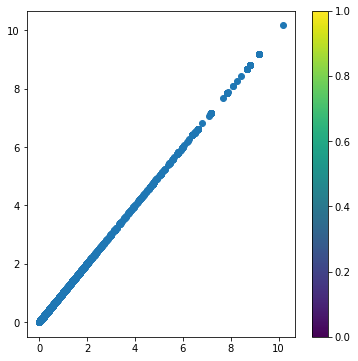

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(val_encode[:, :], val_encode[:, :])
plt.colorbar()
plt.show()

In [27]:
val_encode_df = pd.DataFrame(val_encode)
val_encode_df

,0,1,2,3
0,0.191378,1.494957,1.056647,1.635439
1,0.307679,0.163603,0.148952,0.165371
2,0.288512,1.619091,1.294337,1.833050
3,0.231662,1.367847,1.015004,1.516413
4,3.151699,5.080933,7.164077,7.851844
...,...,...,...,...
927,0.353901,0.120139,0.161553,0.129024
928,0.228696,0.388819,0.205637,0.410261
929,3.151699,5.080933,7.164078,7.851844
930,0.674054,1.166847,1.392862,1.591533


In [28]:
val_encode_df.to_excel('./sae_extra_all_{}_latent_vector_val.xlsx'.format(version))

In [29]:
val_decode = decoder.predict(val_encode)
val_decode

array([[1.99076580e-03, 6.03383465e-04, 5.87885268e-03, ...,
        5.85007410e-06, 4.92048226e-02, 1.61974076e-02],
       [9.67949105e-04, 6.39888644e-03, 9.37258452e-03, ...,
        1.69056226e-02, 3.65443225e-03, 1.83906232e-04],
       [5.21506462e-03, 7.19465781e-04, 5.53123420e-03, ...,
        1.16414139e-06, 7.30948299e-02, 1.85580496e-02],
       ...,
       [1.00987535e-02, 4.55610289e-12, 3.62770621e-12, ...,
        2.21610379e-28, 2.21106831e-08, 4.89240636e-12],
       [1.52529910e-01, 1.03140837e-05, 2.82405119e-04, ...,
        5.67880465e-10, 2.46036192e-03, 6.94996997e-05],
       [1.06041261e-03, 6.63556671e-03, 8.75473488e-03, ...,
        1.89085305e-02, 3.74494214e-03, 1.91076077e-04]], dtype=float32)

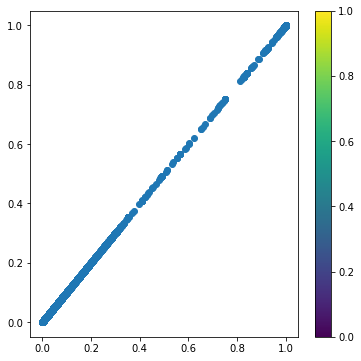

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(val_decode[:, :], val_decode[:, :])
plt.colorbar()
plt.show()

In [31]:
val_predict = val_decode.round()
val_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
"""val_predict = np.where(val_decode > 0.5, 1, 0)
val_predict"""

'val_predict = np.where(val_decode > 0.5, 1, 0)\nval_predict'

In [33]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [34]:
#c_matrix.shape

In [35]:
#c_matrix

In [36]:
print('accuracy : ', accuracy_score(one_hot_val_labels, val_predict))
print('precision : ', precision_score(one_hot_val_labels, val_predict, average='micro'))
print('recall : ', recall_score(one_hot_val_labels, val_predict, average='micro'))
print('f1 : ', f1_score(one_hot_val_labels, val_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_val_labels, val_predict))

accuracy :  0.1276824034334764
precision :  0.9176029962546817
recall :  0.1886066204772902
f1 :  0.3128991060025542
------------------------
hamming_loss :  0.004406513121252825


In [37]:
val_predict_df = pd.DataFrame(val_predict)
val_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#val_predict_df.to_excel('./val_latent_vector.xlsx')

### test data

In [39]:
test_encode = encoder.predict(one_hot_test_labels)
test_encode

array([[3.1516993 , 5.080933  , 7.1640773 , 7.8518443 ],
       [0.2255066 , 0.16121334, 0.03052644, 0.05049594],
       [1.1157413 , 0.42365992, 1.3080018 , 1.0691987 ],
       ...,
       [0.21007012, 0.4087478 , 0.19410533, 0.42147386],
       [1.3975551 , 1.0951873 , 2.152793  , 2.0254915 ],
       [0.41539574, 0.20844984, 0.34453797, 0.3304882 ]], dtype=float32)

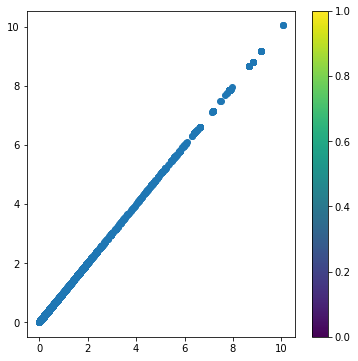

In [40]:
plt.figure(figsize=(6, 6))
plt.scatter(test_encode[:, :], test_encode[:, :])
plt.colorbar()
plt.show()

In [41]:
test_encode_df = pd.DataFrame(test_encode)
test_encode_df

,0,1,2,3
0,3.151699,5.080933,7.164077,7.851844
1,0.225507,0.161213,0.030526,0.050496
2,1.115741,0.423660,1.308002,1.069199
3,5.800450,1.824172,7.856041,6.401890
4,0.000000,4.685583,1.659593,4.400387
...,...,...,...,...
927,1.258299,0.119332,1.243242,0.960823
928,1.188053,1.388057,2.141846,2.207722
929,0.210070,0.408748,0.194105,0.421474
930,1.397555,1.095187,2.152793,2.025491


In [42]:
test_encode_df.to_excel('./sae_extra_all_{}_latent_vector_test.xlsx'.format(version))

In [43]:
test_decode = decoder.predict(test_encode)
test_decode

array([[1.0098768e-02, 4.5561202e-12, 3.6276993e-12, ..., 2.2161038e-28,
        2.2110727e-08, 4.8924159e-12],
       [5.2225660e-06, 1.2391526e-02, 1.9570589e-02, ..., 1.0795337e-02,
        6.1477809e-03, 1.9420093e-03],
       [2.0279775e-05, 3.6606213e-10, 1.3863715e-09, ..., 1.1802082e-16,
        8.0068743e-09, 3.2276397e-11],
       ...,
       [2.9690133e-03, 3.0991959e-03, 8.8046532e-04, ..., 8.0211703e-03,
        1.2924020e-03, 1.6893425e-04],
       [5.6377309e-04, 2.2259834e-09, 7.8729583e-09, ..., 1.1267335e-17,
        2.7160351e-07, 6.6453909e-10],
       [1.8942114e-02, 4.1841701e-04, 4.1762087e-05, ..., 1.7563187e-05,
        1.8533994e-05, 6.9423203e-07]], dtype=float32)

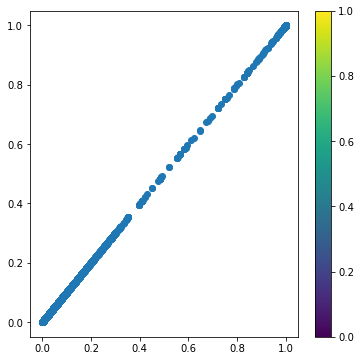

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [45]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [47]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [48]:
#c_matrix.shape

In [49]:
#c_matrix

In [50]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.15021459227467812
precision :  0.9184397163120568
recall :  0.19561933534743203
f1 :  0.32254047322540474
------------------------
hamming_loss :  0.00445565639026308


In [51]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='samples'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.15021459227467812
precision :  0.2757510729613734
recall :  0.20726037195994276
f1 :  0.22789699570815447
------------------------
hamming_loss :  0.00445565639026308


C:\Users\user\.conda\envs\mlc2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
test_predict_df = pd.DataFrame(test_predict)
test_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')